In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
#from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


xls = pd.ExcelFile("data/XRP_historical_data.xlsx")
df = xls.parse(0, skiprows=7, index_col=None, na_values=['NA'])

In [2]:
xrp_df = df.loc[:,['Date','Close**']]

In [3]:
# In ts, a TimeSeries is the type of index. 
# To convert df to ts, make Date column an index
xrp_ts = xrp_df.set_index('Date')

In [4]:
type(xrp_ts)

pandas.core.frame.DataFrame

In [5]:
xrp_ts.head()

,Close**
Date,
2020-01-22,0.236056
2020-01-21,0.237166
2020-01-20,0.233296
2020-01-19,0.235585
2020-01-18,0.243286


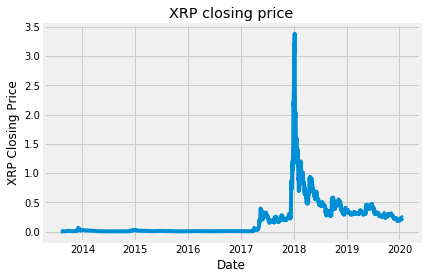

In [7]:
# visualize per day closing price of XRP
# plot the graph
#plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("XRP Closing Price")
plt.plot(xrp_ts['Close**'])
plt.title('XRP closing price')
plt.show()

This data is clearly non stationary trends is upward somewhat and the mean is not constant), but let's check. 

## Check if the series are stationary

### Time series only works with stationary data. Two ways: 
- rolling statistics (can not be automated, this is only visualization)
- Dickey - Fuller test

In [8]:
# Determining rolling statistics
# using window of 12 months to have a monthly forecast.
# for daily forecast, use 365

rolmean = xrp_ts.rolling(window = 12).mean()
rolstd = xrp_ts.rolling(window = 12).std()
rolmean.head(20)


,Close**
Date,
2020-01-22,NaN
2020-01-21,NaN
2020-01-20,NaN
2020-01-19,NaN
2020-01-18,NaN
2020-01-17,NaN
2020-01-16,NaN
2020-01-15,NaN
2020-01-14,NaN


In [11]:
rolstd.head(20)

,Close**
Date,
2020-01-22,NaN
2020-01-21,NaN
2020-01-20,NaN
2020-01-19,NaN
2020-01-18,NaN
2020-01-17,NaN
2020-01-16,NaN
2020-01-15,NaN
2020-01-14,NaN


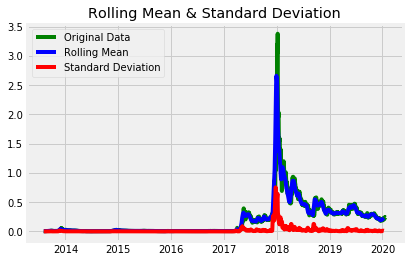

In [13]:
# Plot rolling statistics
orig = plt.plot(xrp_ts, color = 'green', label = 'Original Data')
mean = plt.plot(rolmean, color = 'blue', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'red', label = "Standard Deviation")
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The above chart shows the data is not constant => non stationary. Let's confirm it with the Dickey - Fuller test:

In [16]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey - Fuller test:')
dftest = adfuller(xrp_ts['Close**'], autolag='AIC') # Akake Information Criterion
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations User'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey - Fuller test:
Test Statistic                   -3.612693
p-value                           0.005523
#Lags Used                       27.000000
Number of Observations User    2335.000000
Critical Value (1%)              -3.433154
Critical Value (5%)              -2.862779
Critical Value (10%)             -2.567429
dtype: float64


- P-value is less than 0.5 (good)
- Critical value is more than the test statistics (good)

We can reject the null hypothesis and say that data is non-stationary 